In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from astropy.io import ascii

/Users/yaolun/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
data = ascii.read('/Users/yaolun/bhr71/data/BHR71_queue_SEIP.tbl')

In [6]:
print data.colnames

['objid', 'crowded', 'badbkgmatch', 'ra', 'dec', 'l', 'b', 'nmatches', 'nreject', 'nbands', 'i1_fluxtype', 'i2_fluxtype', 'i3_fluxtype', 'i4_fluxtype', 'm1_fluxtype', 'i1_fluxflag', 'i2_fluxflag', 'i3_fluxflag', 'i4_fluxflag', 'm1_fluxflag', 'i1_softsatflag', 'i2_softsatflag', 'i3_softsatflag', 'i4_softsatflag', 'i1_f_ap1', 'i1_df_ap1', 'i1_f_ap2', 'i1_df_ap2', 'i1_f_ap1_bf', 'i1_df_ap1_bf', 'i1_f_ap2_bf', 'i1_df_ap2_bf', 'i1_f_ap1_3siglim', 'i1_f_ap2_3siglim', 'i2_f_ap1', 'i2_df_ap1', 'i2_f_ap2', 'i2_df_ap2', 'i2_f_ap1_bf', 'i2_df_ap1_bf', 'i2_f_ap2_bf', 'i2_df_ap2_bf', 'i2_f_ap1_3siglim', 'i2_f_ap2_3siglim', 'i3_f_ap1', 'i3_df_ap1', 'i3_f_ap2', 'i3_df_ap2', 'i3_f_ap1_bf', 'i3_df_ap1_bf', 'i3_f_ap2_bf', 'i3_df_ap2_bf', 'i3_f_ap1_3siglim', 'i3_f_ap2_3siglim', 'i4_f_ap1', 'i4_df_ap1', 'i4_f_ap2', 'i4_df_ap2', 'i4_f_ap1_bf', 'i4_df_ap1_bf', 'i4_f_ap2_bf', 'i4_df_ap2_bf', 'i4_f_ap1_3siglim', 'i4_f_ap2_3siglim', 'm1_f_psf', 'm1_df_psf', 'm1_f_ap', 'm1_df_ap', 'm1_f_psf_bf', 'm1_df_psf_bf',

## Location around BHR71

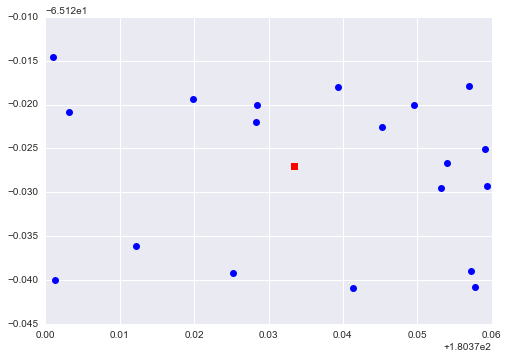

In [13]:
# Coordinates of BHR71:
ra_cen  = 180.403375
dec_cen = -65.14700556
plt.plot(data['ra'], data['dec'],'o',mec='None', color='b')
plt.plot(ra_cen, dec_cen, 's', mec='None', color='r')

To retain only the most robust flux densities, apply the following cuts:
1. Make a SNR cut. Each source has 5 columns ending in “fluxtype”, four for each of the IRAC
channels and one for MIPS-24. Flux densities with SNR>=3 for IRAC and >=10 for MIPS1 have
*fluxtype=1.
2. Eliminate IRAC flux densities that may be affected by a nearby saturated source or a nearby
extended source. There are four “fluxflag” columns, one for each IRAC channel. Choose
*fluxflag=0.
3. Eliminate MIPS flux densities that may be affected by a nearby saturated source or a nearby
extended source by choosing m1_brtfrac<0.5 and m1_extfrac<0.5.
4. Remove IRAC flux densities affected by soft saturation. There are four *softsatflag columns,
one for each IRAC channel. Choose *softsatflag=0.
5. As long as you have filtered by *fluxtype = 1 (item #1 above), then you can use the following
rules. For IRAC, use the 3.8 arcsec diameter aperture flux densities and the associated
uncertainties (columns *f_ap1). For MIPS, use the PSF flux density and the associated
uncertainties (m1_f_psf).

## Color analysis

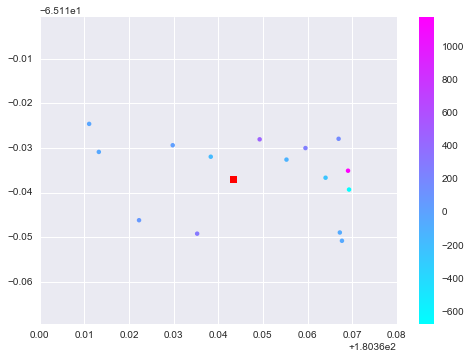

In [42]:
# source selection
# fluxflag doesn't work here.  If applied, only two/zero sources would be selected.
selector = (data['i1_fluxtype'] == 1) & (data['i1_softsatflag'] == 0) & \
           (data['i2_fluxtype'] == 1) & (data['i2_softsatflag'] == 0)
# IRAC1 - IRAC2
irac_color = data['i1_f_ap1'][selector] - data['i2_f_ap2'][selector]

cmap = plt.cm.cool
norm = mpl.colors.Normalize(vmin=irac_color.min(),vmax=irac_color.max())

# Coordinates of BHR71:
ra_cen  = 180.403375
dec_cen = -65.14700556
plt.plot(ra_cen, dec_cen, 's', mec='None', color='r')

sc = plt.scatter(data['ra'][selector], data['dec'][selector], c=irac_color,
            marker='o', s=20, edgecolor='None', vmin=irac_color.min(), vmax=irac_color.max(),
            cmap=plt.cm.cool)
plt.colorbar(sc)
plt.xlim([180.36,180.44])
plt.ylim([-65.15,-65.14])
plt.axes().set_aspect('equal', 'datalim')

In [ ]:
# source selection
# fluxflag doesn't work here.  If applied, only two/zero sources would be selected.
selector = (data['i1_fluxtype'] == 1) & (data['i1_softsatflag'] == 0) & \
           (data['i2_fluxtype'] == 1) & (data['i2_softsatflag'] == 0)